In [1]:
#4.10修改笔记，重新整理整体程序，加强分段存储；
#增加gama矩阵的对应，调整输入文件
#计算重新调试好的k-path
#整理好后完成上传同步公开
import os,sys,math,cmath
import numpy as np
import tkinter as tk
import matplotlib.pyplot as plt
from tkinter import ttk
from tkinter import messagebox as mbox
from tkinter import filedialog as fd
import pandas as pd

base_num=6
mass=np.array([1,1])
stiff=np.array([200,15,10,20])
a=2 #格子定数
b=3
matD=np.empty((base_num,base_num),dtype=complex)
pi=np.pi #円周率
i_num=1j #虚数
kpoint_num=8 #高对称点总数
route_num=4 #k-path线路数
kpr1=10 #k-path route 1,2,3 包含的高对称点个数，-1可得每条线路的连线数
kpr2=2
kpr3=2
kpr4=2
kpr5=0 #所需参数进一步自动化（从excel读取）
kpr=np.array([kpr1,kpr2,kpr3,kpr4,kpr5])

#每两个高对称点之间取点的个数
k_num=10

#更新笔记：由于改变了矩阵的变换规则，面心非平移分子的矩阵变换规则改变。做出对应调整
#和06一样，修正函数错误以及文件读取错位的问题。
#更新笔记0208：完善了矩阵和对称关系的对应以及组合计算，提出简单的ASR修正（程序中未体现）

In [2]:
file_name="read_fai_07.xlsx"

df_1=pd.read_excel(file_name, sheet_name='c=-1')
df_2=pd.read_excel(file_name, sheet_name='c=0')
df_3=pd.read_excel(file_name, sheet_name='c=1')
df_4=pd.read_excel(file_name, sheet_name='面心c=-1')
df_5=pd.read_excel(file_name, sheet_name='面心c=0')
df_6=pd.read_excel(file_name, sheet_name='面心c=1')
df_7=pd.read_excel(file_name, sheet_name='lattice constant')
df_8=pd.read_excel(file_name, sheet_name='Γ')
df_9=pd.read_excel(file_name, sheet_name='k-path')
df_10=pd.read_excel(file_name, sheet_name='SO')
df_1=df_1.fillna(0)
df_2=df_2.fillna(0)
df_3=df_3.fillna(0)
df_4=df_4.fillna(0)
df_5=df_5.fillna(0)
df_6=df_6.fillna(0)
df_9=df_9.fillna(0)
df_10=df_10.fillna(0)

In [3]:
matG=np.zeros((2*base_num,2*base_num),dtype=complex)

#c=-1
matK15=np.zeros((base_num,base_num),dtype=complex) #b-c
matK18=np.zeros((base_num,base_num),dtype=complex) #a-b-c
matK21=np.zeros((base_num,base_num),dtype=complex) #a-c
matK24=np.zeros((base_num,base_num),dtype=complex) #a+b-c

#c=0
matK13=np.zeros((base_num,base_num),dtype=complex) #中心
matK22=np.zeros((base_num,base_num),dtype=complex) #a軸上
matK16=np.zeros((base_num,base_num),dtype=complex) #b軸上
matK25=np.zeros((base_num,base_num),dtype=complex) #ab
matK19=np.zeros((base_num,base_num),dtype=complex) #a-b

#c=1
matK14=np.zeros((base_num,base_num),dtype=complex) #c軸上
matK17=np.zeros((base_num,base_num),dtype=complex) #bc
matK20=np.zeros((base_num,base_num),dtype=complex) #a-bc
matK23=np.zeros((base_num,base_num),dtype=complex) #ac
matK26=np.zeros((base_num,base_num),dtype=complex) #abc

#面心c=-1
matk0=np.zeros((base_num,base_num),dtype=complex)
matk3=np.zeros((base_num,base_num),dtype=complex)
matk6=np.zeros((base_num,base_num),dtype=complex)
matk9=np.zeros((base_num,base_num),dtype=complex)
matk12=np.zeros((base_num,base_num),dtype=complex)
matk15=np.zeros((base_num,base_num),dtype=complex)
matk18=np.zeros((base_num,base_num),dtype=complex)
matk21=np.zeros((base_num,base_num),dtype=complex)
matk24=np.zeros((base_num,base_num),dtype=complex)

#面心c=0
matk1=np.zeros((base_num,base_num),dtype=complex)
matk4=np.zeros((base_num,base_num),dtype=complex)
matk7=np.zeros((base_num,base_num),dtype=complex)
matk10=np.zeros((base_num,base_num),dtype=complex)
matk13=np.zeros((base_num,base_num),dtype=complex) #中心
matk22=np.zeros((base_num,base_num),dtype=complex) #a軸上
matk16=np.zeros((base_num,base_num),dtype=complex) #b軸上
matk25=np.zeros((base_num,base_num),dtype=complex) #ab
matk19=np.zeros((base_num,base_num),dtype=complex) #a-b

#面心c=1
matk2=np.zeros((base_num,base_num),dtype=complex)
matk5=np.zeros((base_num,base_num),dtype=complex)
matk8=np.zeros((base_num,base_num),dtype=complex)
matk11=np.zeros((base_num,base_num),dtype=complex)
matk14=np.zeros((base_num,base_num),dtype=complex) #c軸上
matk17=np.zeros((base_num,base_num),dtype=complex) #bc
matk20=np.zeros((base_num,base_num),dtype=complex) #a-bc
matk23=np.zeros((base_num,base_num),dtype=complex) #ac
matk26=np.zeros((base_num,base_num),dtype=complex) #abc

for i in range(1,route_num+1):#k-path 坐标输入
    exec("matR"+str(i)+"=np.array(df_9.iloc[0:kpr"+str(i)+",7+5*(i-1):11+5*(i-1)],dtype=complex)")

M=np.array(df_10.iloc[0:base_num,0:base_num],dtype=complex)#对称操作输入
R=np.array(df_10.iloc[8:8+base_num,0:base_num],dtype=complex)
I=np.array(df_10.iloc[16:16+base_num,0:base_num],dtype=complex)
    
#Glide c=-1
matgK0=np.zeros((base_num,base_num),dtype=complex)
matgK3=np.zeros((base_num,base_num),dtype=complex)
matgK6=np.zeros((base_num,base_num),dtype=complex)
matgK9=np.zeros((base_num,base_num),dtype=complex)
matgK12=np.zeros((base_num,base_num),dtype=complex)
matgK15=np.zeros((base_num,base_num),dtype=complex)
matgK18=np.zeros((base_num,base_num),dtype=complex)
matgK21=np.zeros((base_num,base_num),dtype=complex)
matgK24=np.zeros((base_num,base_num),dtype=complex)

#c=0
matgK1=np.zeros((base_num,base_num),dtype=complex)
matgK4=np.zeros((base_num,base_num),dtype=complex)
matgK7=np.zeros((base_num,base_num),dtype=complex)
matgK10=np.zeros((base_num,base_num),dtype=complex)
matgK13=np.zeros((base_num,base_num),dtype=complex) #中心
matgK22=np.zeros((base_num,base_num),dtype=complex) #a軸上
matgK16=np.zeros((base_num,base_num),dtype=complex) #b軸上
matgK25=np.zeros((base_num,base_num),dtype=complex) #ab
matgK19=np.zeros((base_num,base_num),dtype=complex) #a-b

#c=1
matgK2=np.zeros((base_num,base_num),dtype=complex)
matgK5=np.zeros((base_num,base_num),dtype=complex)
matgK8=np.zeros((base_num,base_num),dtype=complex)
matgK11=np.zeros((base_num,base_num),dtype=complex)
matgK14=np.zeros((base_num,base_num),dtype=complex) #c軸上
matgK17=np.zeros((base_num,base_num),dtype=complex) #bc
matgK20=np.zeros((base_num,base_num),dtype=complex) #a-bc
matgK23=np.zeros((base_num,base_num),dtype=complex) #ac
matgK26=np.zeros((base_num,base_num),dtype=complex) #abc

#面心c=-1
matgk0=np.zeros((base_num,base_num),dtype=complex)
matgk3=np.zeros((base_num,base_num),dtype=complex)
matgk6=np.zeros((base_num,base_num),dtype=complex)
matgk9=np.zeros((base_num,base_num),dtype=complex)
matgk12=np.zeros((base_num,base_num),dtype=complex)
matgk15=np.zeros((base_num,base_num),dtype=complex)
matgk18=np.zeros((base_num,base_num),dtype=complex)
matgk21=np.zeros((base_num,base_num),dtype=complex)
matgk24=np.zeros((base_num,base_num),dtype=complex)

#面心c=0
matgk1=np.zeros((base_num,base_num),dtype=complex)
matgk4=np.zeros((base_num,base_num),dtype=complex)
matgk7=np.zeros((base_num,base_num),dtype=complex)
matgk10=np.zeros((base_num,base_num),dtype=complex)
matgk13=np.zeros((base_num,base_num),dtype=complex) #中心
matgk22=np.zeros((base_num,base_num),dtype=complex) #a軸上
matgk16=np.zeros((base_num,base_num),dtype=complex) #b軸上
matgk25=np.zeros((base_num,base_num),dtype=complex) #ab
matgk19=np.zeros((base_num,base_num),dtype=complex) #a-b

#面心c=1
matgk2=np.zeros((base_num,base_num),dtype=complex)
matgk5=np.zeros((base_num,base_num),dtype=complex)
matgk8=np.zeros((base_num,base_num),dtype=complex)
matgk11=np.zeros((base_num,base_num),dtype=complex)
matgk14=np.zeros((base_num,base_num),dtype=complex) #c軸上
matgk17=np.zeros((base_num,base_num),dtype=complex) #bc
matgk20=np.zeros((base_num,base_num),dtype=complex) #a-bc
matgk23=np.zeros((base_num,base_num),dtype=complex) #ac
matgk26=np.zeros((base_num,base_num),dtype=complex) #abc

In [4]:
matG=np.array(df_8.iloc[0:2*base_num,0:2*base_num],dtype=complex)

matK15=np.array(df_1.iloc[0:base_num,6:6+base_num],dtype=complex)
matK24=np.array(df_1.iloc[0:base_num,17:17+base_num],dtype=complex)
matK21=np.array(df_1.iloc[12:12+base_num,17:17+base_num],dtype=complex)
matK18=np.array(df_1.iloc[24:24+base_num,17:17+base_num],dtype=complex)

matK16=np.array(df_2.iloc[0:base_num,6:6+base_num],dtype=complex)
matK13=np.array(df_2.iloc[12:12+base_num,6:6+base_num],dtype=complex)
matK25=np.array(df_2.iloc[0:base_num,17:17+base_num],dtype=complex)
matK22=np.array(df_2.iloc[12:12+base_num,17:17+base_num],dtype=complex)
matK19=np.array(df_2.iloc[24:24+base_num,17:17+base_num],dtype=complex)

matK17=np.array(df_3.iloc[0:base_num,6:6+base_num],dtype=complex)
matK14=np.array(df_3.iloc[12:12+base_num,6:6+base_num],dtype=complex)
matK26=np.array(df_3.iloc[0:base_num,17:17+base_num],dtype=complex)
matK23=np.array(df_3.iloc[12:12+base_num,17:17+base_num],dtype=complex)
matK20=np.array(df_3.iloc[24:24+base_num,17:17+base_num],dtype=complex)

matk15=np.array(df_4.iloc[0:base_num,6:6+base_num],dtype=complex)
matk12=np.array(df_4.iloc[12:12+base_num,6:6+base_num],dtype=complex)#非0 13 M T
matk9=np.array(df_4.iloc[24:24+base_num,6:6+base_num],dtype=complex)#非0 13 i
matk24=np.array(df_4.iloc[0:base_num,17:17+base_num],dtype=complex)
matk5=np.array(df_4.iloc[12:12+base_num,17:17+base_num],dtype=complex)#非0 22 M T
matk2=np.array(df_4.iloc[24:24+base_num,17:17+base_num],dtype=complex)#非0 22 i

matk16=np.array(df_5.iloc[0:base_num,6:6+base_num],dtype=complex)
matk13=np.array(df_5.iloc[12:12+base_num,6:6+base_num],dtype=complex)#非0 计算值
matk10=np.array(df_5.iloc[24:24+base_num,6:6+base_num],dtype=complex)#非0 13 R T
matk25=np.array(df_5.iloc[0:base_num,17:17+base_num],dtype=complex)
matk4=np.array(df_5.iloc[12:12+base_num,17:17+base_num],dtype=complex)#非0 计算值
matk1=np.array(df_5.iloc[24:24+base_num,17:17+base_num],dtype=complex)#非0 22 R T

matk17=np.array(df_6.iloc[0:base_num,6:6+base_num],dtype=complex)
matk14=np.array(df_6.iloc[12:12+base_num,6:6+base_num],dtype=complex)
matk26=np.array(df_6.iloc[0:base_num,17:17+base_num],dtype=complex)
matk3=np.array(df_6.iloc[12:12+base_num,17:17+base_num],dtype=complex)
matk11=np.array(df_6.iloc[24:24+base_num,6:6+base_num],dtype=complex)
matk0=np.array(df_6.iloc[24:24+base_num,17:17+base_num],dtype=complex)

print(matG)
print(matk13)

[[ 2.8672e-01+0.j  0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j
   0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j
   0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j]
 [ 0.0000e+00+0.j  2.8672e-01+0.j  0.0000e+00+0.j  0.0000e+00+0.j
   0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j
   0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j]
 [ 0.0000e+00+0.j  0.0000e+00+0.j  2.8672e-01+0.j  0.0000e+00+0.j
   0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j
   0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j]
 [ 0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j  5.2150e-01+0.j
   0.0000e+00+0.j -1.0000e-05+0.j  0.0000e+00+0.j  0.0000e+00+0.j
   0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j]
 [ 0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j
   2.0250e-01+0.j  0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j
   0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j  0.0000e+00+0.j]
 [ 0.

In [5]:
list_eigen=[[[0] * (k_num+1) for i in range(max(kpr1,kpr2,kpr3))] for j in range(route_num)] #固有値

In [6]:
#K0-12にK14-26の転置を代入
for i in range(0,13):
    exec("matK"+str(i)+"=matK"+str(26-i)+".T")
#glide-glide 代入
for a in range(-1,2):
    for c in range(-1,2):
        for b in range(-1,2):
            n=(a+1)*9+(b+1)*3+c+1
            exec("matgK"+str(n)+"=np.dot(np.dot(M,matK"+str(n)+"),M)")
            if(b!=0):
                exec("matgK"+str(n)+"=matgK"+str(n)+".T")

#gk-k 代入
for i in range(0,27):
    exec("matgk"+str(i)+"=matk"+str(26-i)+".T")

for r in range(0, route_num):
    exec("matR=matR"+str(r+1)+"")
    for p in range(0, kpr[r]-1):
        for k in range(0, k_num+1):
            a_i=(2*pi*(k/k_num*(matR[p+1,0]-matR[p,0])+matR[p,0]))*i_num
            b_i=(2*pi*(k/k_num*(matR[p+1,1]-matR[p,1])+matR[p,1]))*i_num
            c_i=(2*pi*(k/k_num*(matR[p+1,2]-matR[p,2])+matR[p,2]))*i_num
            
            matK=np.zeros((2*base_num,2*base_num),dtype=complex)
            
            
            for a in range(-1,2):
                for b in range(-1,2):
                    for c in range(-1,2):
                        n=(a+1)*9+(b+1)*3+c+1
                        exec("matK+=np.hstack((np.vstack((matK"+str(n)+",matgk"+str(n)+")),np.vstack((matk"+str(n)+",matgK"+str(n)+"))))*cmath.exp(a*a_i+b*b_i+c*c_i)")
            if(r==0):
                if(p==0):
                    if(k==0):
                        #print(str(kx)+", "+str(ky)+", "+str(kz))
                        print(matK)
                        
            exec("matD=np.dot(matG,matK)")
            exec("matK=np.dot(matD,matG)")
            
            l,P=np.linalg.eig(matK)

            l=np.sort(l,axis=0)
            v=np.transpose(P)

            list_eigen[r][p][k]=l.tolist()


[[ 2.11266415e+00+0.j -1.27066979e-02+0.j  2.95742206e-01+0.j
  -2.08166817e-17+0.j -8.32667268e-17+0.j -1.66533454e-16+0.j
  -2.11266415e+00+0.j  1.27066979e-02+0.j -2.95742206e-01+0.j
  -6.93889390e-18+0.j  1.38777878e-17+0.j -1.04083409e-17+0.j]
 [ 1.27066979e-02+0.j  6.47503969e-01+0.j  2.38997365e-02+0.j
   2.49800181e-16+0.j  5.55111512e-17+0.j -5.55111512e-17+0.j
  -1.27066979e-02+0.j -6.47503969e-01+0.j -2.38997365e-02+0.j
   6.93889390e-18+0.j  0.00000000e+00+0.j  2.60208521e-18+0.j]
 [ 2.95742206e-01+0.j -2.38997365e-02+0.j  1.21689305e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  -2.95742206e-01+0.j  2.38997365e-02+0.j -1.21689305e+00+0.j
  -1.38777878e-17+0.j -8.32667268e-17+0.j -6.93889390e-18+0.j]
 [ 4.16333634e-17+0.j  1.66533454e-16+0.j -1.11022302e-16+0.j
   4.34959942e+00+0.j  1.23171125e+00+0.j  1.73879971e+00+0.j
   0.00000000e+00+0.j -6.93889390e-18+0.j  0.00000000e+00+0.j
   5.00579189e-01+0.j  4.94797450e-01+0.j  2.00385386e-01+0.j]
 [-4

In [8]:
y=[[[[0.0+0j]*(k_num+1) for k in range(2*base_num)] for i in range(max(kpr1,kpr2,kpr3))] for j in range(route_num)]
for r in range(0,route_num):
    for p in range(0, kpr[r]-1):
        for value in range(0,2*base_num): #value 震动模式的序列
            for k in range(0,k_num+1):
                y[r][p][value][k]=list_eigen[r][p][k][value]

np_eigen=np.array(y,dtype=complex)

for i in range(0,12):
    print(np.sqrt(np_eigen[0][0][i]/0.000059))

[0.        +2.03756481e-06j 0.786179  -5.52572084e-14j
 1.58548172+5.93033088e-14j 2.4080523 +9.69119531e-14j
 3.25887831-2.12949264e-15j 4.13679745+4.53394321e-14j
 5.03453686-4.20113944e-14j 5.93929397+1.38450513e-13j
 6.83328243-7.20202792e-15j 7.69369817-9.67889550e-15j
 8.49151897+1.08203892e-16j]
[1.42766073e-06+0.00000000e+00j 2.33048782e+00+2.90703645e-15j
 4.56962776e+00+1.22958152e-14j 6.60193318e+00-4.35720699e-15j
 8.27255354e+00-2.68960157e-15j 9.41952548e+00-1.99244285e-15j
 9.97826002e+00+3.13719748e-14j 1.00331533e+01+1.76335768e-14j
 9.72946408e+00+1.89170706e-14j 9.18828201e+00-3.89837679e-15j
 8.49151897e+00-1.66363484e-15j]
[2.19767199e-06+0.00000000e+00j 5.16341153e+00-1.81757695e-16j
 1.02957830e+01+2.50147674e-15j 1.53644330e+01-2.02881552e-15j
 1.86581549e+01-3.38588478e-15j 1.95658171e+01-4.19702285e-15j
 2.09386366e+01+1.18792028e-14j 2.26840611e+01-4.12938476e-16j
 2.46501967e+01+3.90009303e-15j 2.67086102e+01-1.13931066e-15j
 2.87649602e+01+2.04429922e-15j]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

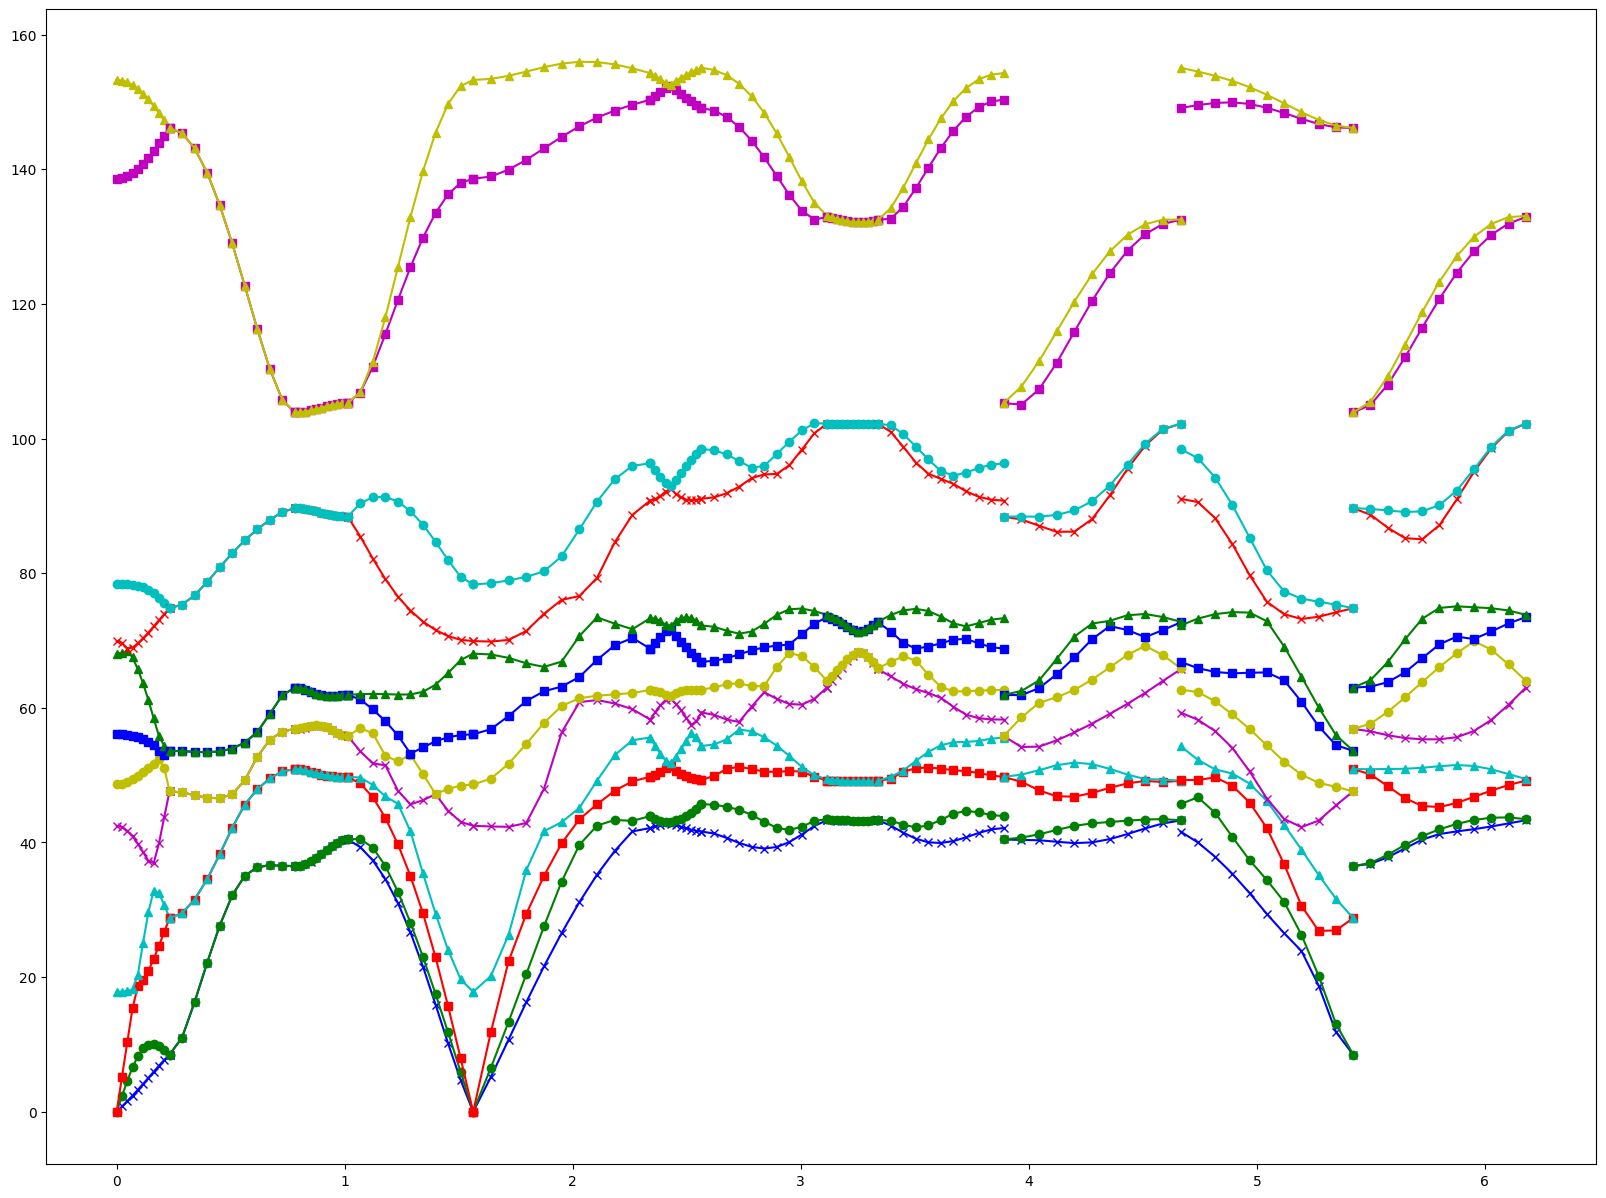

In [9]:
plt.clf()

plt.figure(figsize=(20,15))
x1=0
#计算各个高对称点之间的步长，以此给x赋值。
for r in range(0,route_num):
    exec("matR=matR"+str(r+1)+"")
    for p in range(0, kpr[r]-1):
        s=matR[p+1,3]
        x=np.array([x1,x1+0.1*s,x1+0.2*s,x1+0.3*s,x1+0.4*s,x1+0.5*s,x1+0.6*s,x1+0.7*s,x1+0.8*s,x1+0.9*s,x1+s])
        x1=x1+s
        
        plt.plot(x,np.sqrt(np_eigen[r][p][0]/0.000059),color='b',marker='x')
        plt.plot(x,np.sqrt(np_eigen[r][p][1]/0.000059),'g-o')
        plt.plot(x,np.sqrt(np_eigen[r][p][2]/0.000059),'r-s')
        plt.plot(x,np.sqrt(np_eigen[r][p][3]/0.000059),'c-^')
        plt.plot(x,np.sqrt(np_eigen[r][p][4]/0.000059),'m-x')
        plt.plot(x,np.sqrt(np_eigen[r][p][5]/0.000059),'y-o')
        plt.plot(x,np.sqrt(np_eigen[r][p][6]/0.000059),'b-s')
        plt.plot(x,np.sqrt(np_eigen[r][p][7]/0.000059),'g-^')
        plt.plot(x,np.sqrt(np_eigen[r][p][8]/0.000059),'r-x')
        plt.plot(x,np.sqrt(np_eigen[r][p][9]/0.000059),'c-o')
        plt.plot(x,np.sqrt(np_eigen[r][p][10]/0.000059),'m-s')
        plt.plot(x,np.sqrt(np_eigen[r][p][11]/0.000059),'y-^')

plt.show()

In [10]:
#DOS计算模块：由4分之一FBZ的统计得到，整体应该分为计算部分和能量分拣部分。
#计算区间的判断为各个方向（逆向量）的极值（循环范围）和数个不等式（判断语句）组成。

s=0.01
b1=0.918466521680647
b2=1.04354680596915
b3=1.06836461869084

list_eigenfbz=[[[0] * (67) for i in range(53)] for j in range(46+71)]

for m1 in range(0,46+71):#取值范围由高对称点中对应坐标的极值决定（系数乘以模长），下方的判断语句由解决不等式问题得到
    m=m1-71
    for m3 in range(0,67):
        for m2 in range(0,53):
            #if (-0.459233260840324-m3*s*0.608899886015249<=m*s<=0.459233260840324-m3*s*0.608899886015249) and (m3*s<=0.534182309345421-m*s*0.608899886015249) and (m*s*-0.267939427137069+m3*s*0.509110458330674<=0.39500449717483):
                a_i=(2*pi*m*s/b1)*i_num
                b_i=(2*pi*m2*s/b2)*i_num
                c_i=(2*pi*m3*s/b3)*i_num
                matK=np.zeros((2*base_num,2*base_num),dtype=complex)
                for a in range(-1,2):
                    for b in range(-1,2):
                        for c in range(-1,2):
                            n=(a+1)*9+(b+1)*3+c+1
                            exec("matK+=np.hstack((np.vstack((matK"+str(n)+",matgk"+str(n)+")),np.vstack((matk"+str(n)+",matgK"+str(n)+"))))*cmath.exp(a*a_i+b*b_i+c*c_i)")
                exec("matD=np.dot(matG,matK)")
                exec("matK=np.dot(matD,matG)")
            
                l,P=np.linalg.eig(matK)

                l=np.sort(l,axis=0)
                v=np.transpose(P)
                
                list_eigenfbz[m1][m2][m3]=l.tolist()

z=[[[[0.0+0j]*(2*base_num) for i in range(67)] for j in range(53)] for k in range(71+46)]
for m1 in range(0,71+46):
    m=m1-71
    for m3 in range(0, 67):
        for m2 in range(0,53):
            for value in range(0,12):
                #if -0.459233260840324-m3*s*0.608899886015249<=m*s<=0.459233260840324-m3*s*0.608899886015249 and m3*s<=0.534182309345421-m*s*0.608899886015249 and m*s*-0.267939427137069+m3*s*0.509110458330674<=0.39500449717483:
                    z[m1][m2][m3][value]=list_eigenfbz[m1][m2][m3][value]

np_eigenfbz=np.array(z,dtype=complex)            

<Figure size 640x480 with 0 Axes>

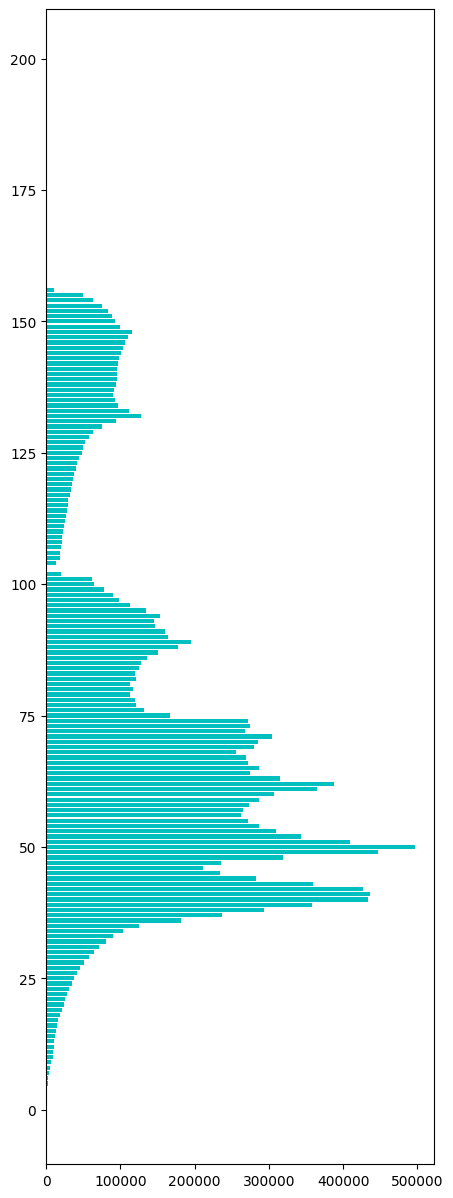

In [11]:
plt.clf()
plt.figure(figsize=(5,15))
for x in range(0,200):#范围由声子谱范围决定
    n=0
    for m1 in range(-71,46):#取值范围由高对称点中对应坐标的极值决定（系数乘以模长），下方的判断语句由解决不等式问题得到
        m=m1+71
        for m3 in range(0,67):
            for m2 in range(0,53):
                for value in range(0,2*base_num):
                    #if -0.459233260840324-m3*s*0.608899886015249<=m1*s<=0.459233260840324-m3*s*0.608899886015249 and m3*s<=0.534182309345421-m1*s*0.608899886015249 and m1*s*-0.267939427137069+m3*s*0.509110458330674<=0.39500449717483:
                        if x<=np.real(np.sqrt(np_eigenfbz[m][m2][m3][value]/0.000059))<x+1:
                            n=n+1
    n=n*4
    plt.barh(x,n,color='c')

plt.show()
                         

<Figure size 432x288 with 0 Axes>

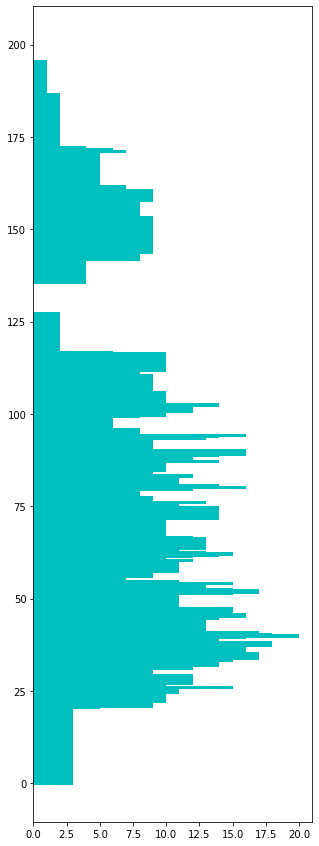

In [68]:
plt.clf()
plt.figure(figsize=(5,15))
for x in range(0,2000):#范围由声子谱范围决定
    n=0
    for r in range(0,route_num):
        for p in range(0, kpr[r]-1):
            for value in range(0,2*base_num): 
                for k in range(0,k_num):
                    if np.real(np.sqrt(np_eigen[r][p][value][k]/0.000059))<x/10<=np.real(np.sqrt(np_eigen[r][p][value][k+1]/0.000059)):
                        n=n+1
                    if np.real(np.sqrt(np_eigen[r][p][value][k]/0.000059))>x/10>=np.real(np.sqrt(np_eigen[r][p][value][k+1]/0.000059)):
                        n=n+1
    if (x==0):
        n=3
    plt.barh(x/10,n,color='c')

plt.show()